<a href="https://colab.research.google.com/github/ChaitanyaDani5802/Edunet-Foundation-Internship-Project-MS-AINST-/blob/main/Crops_Recommendation_Analysis_%5BChaitanya_Dani_%3CInternship_project%3E%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Important Libraries and Loading the Data Insights

In [120]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [121]:
crops_df = pd.read_csv('/content/sample_data/crop_recommendation.csv')
crops_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [122]:
crops_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [123]:
crops_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [124]:
crops_df.shape

(2200, 8)

In [125]:
crops_df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [126]:
crops_df.size

17600

 # Data Analysis or Visualizations of given data

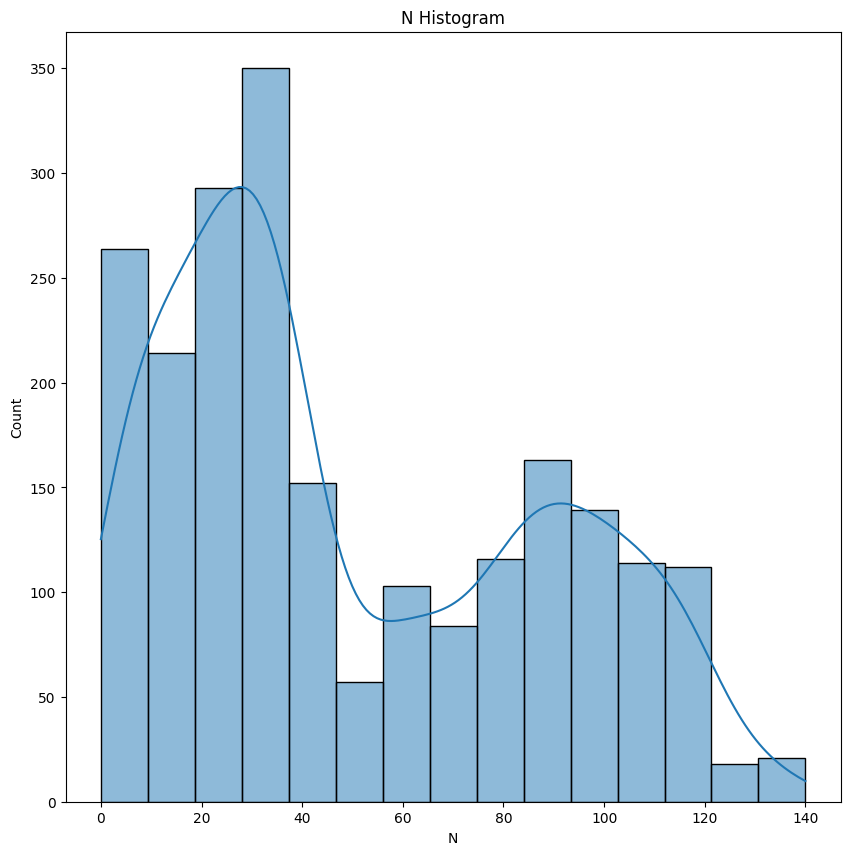

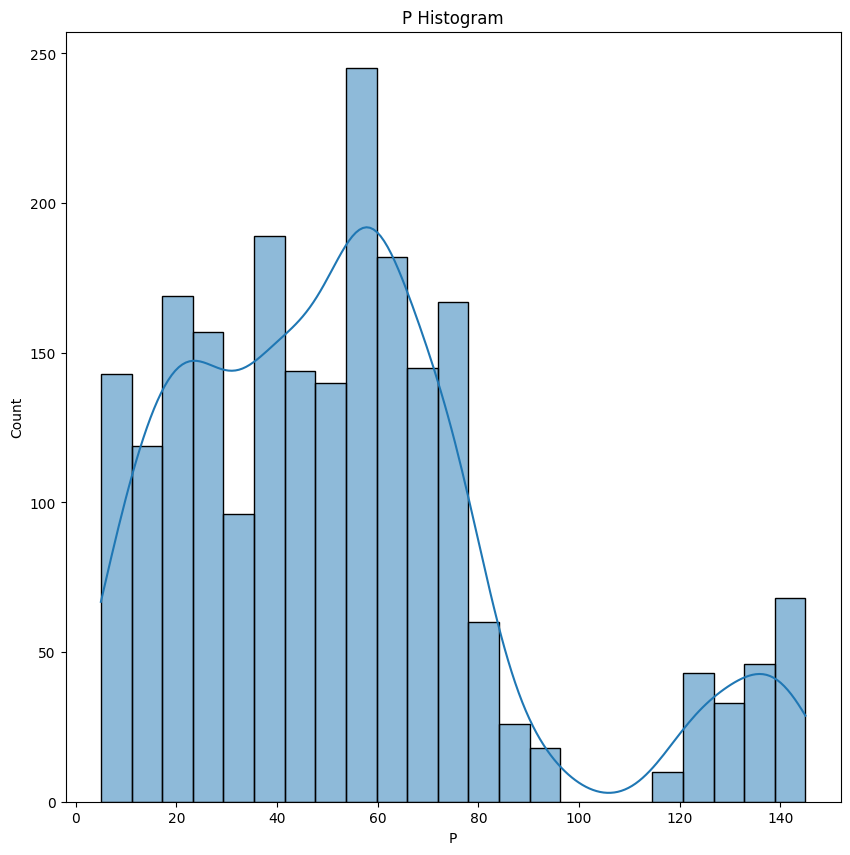

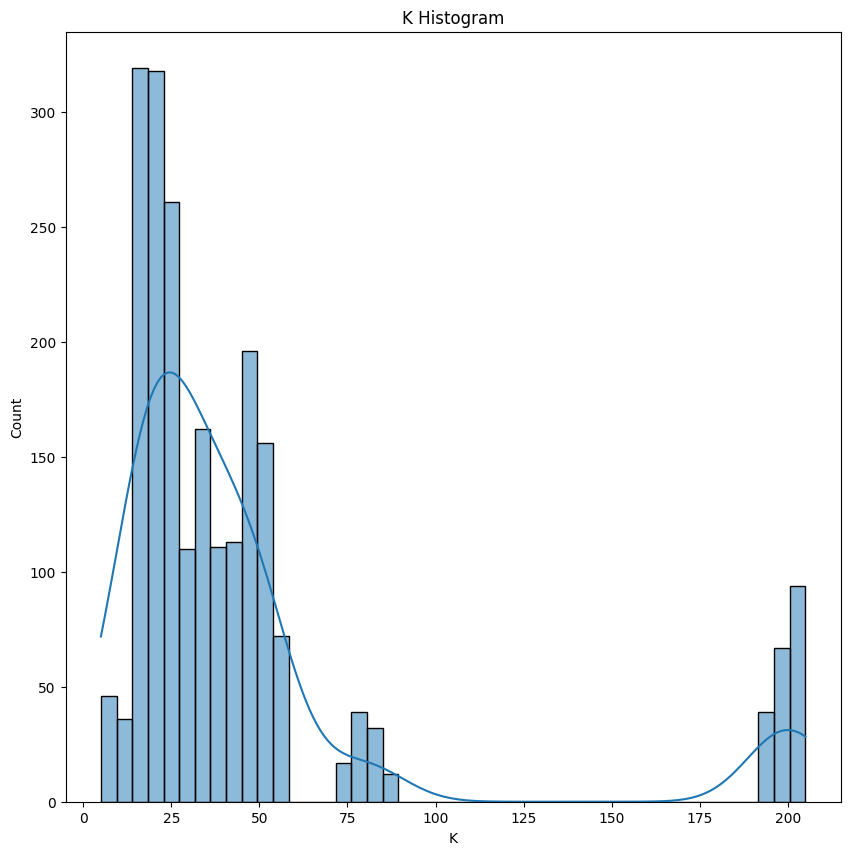

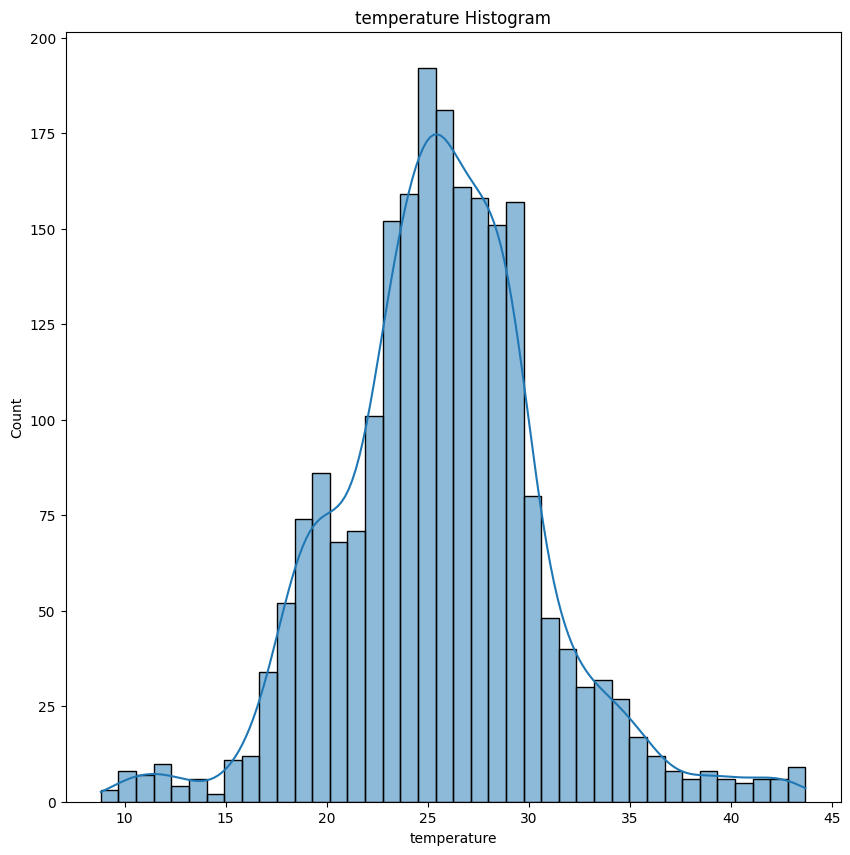

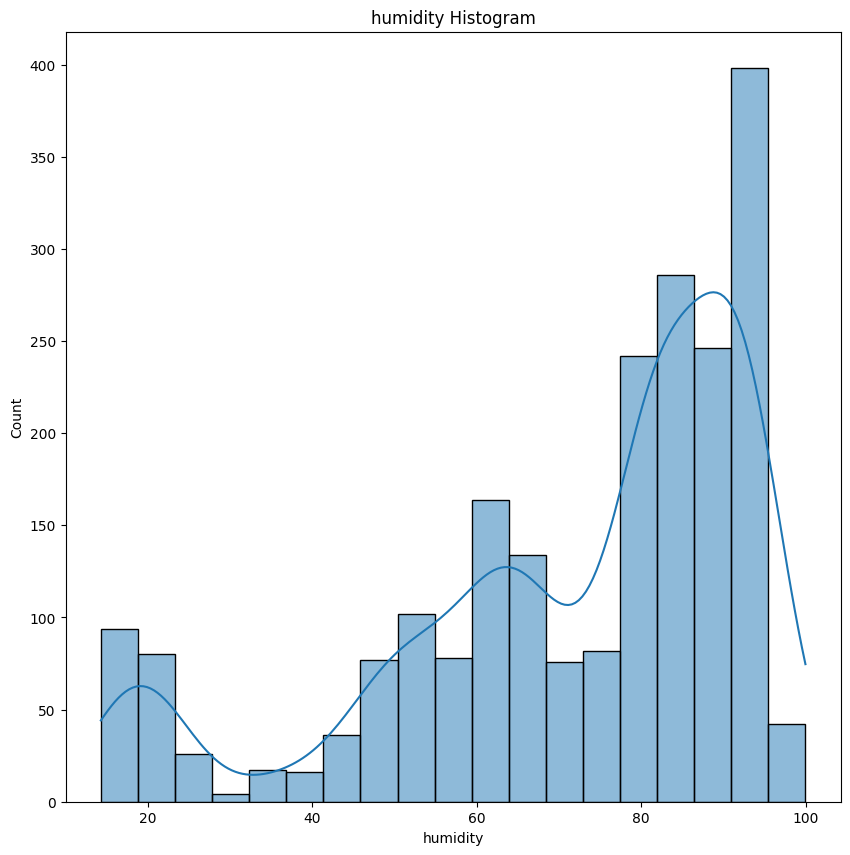

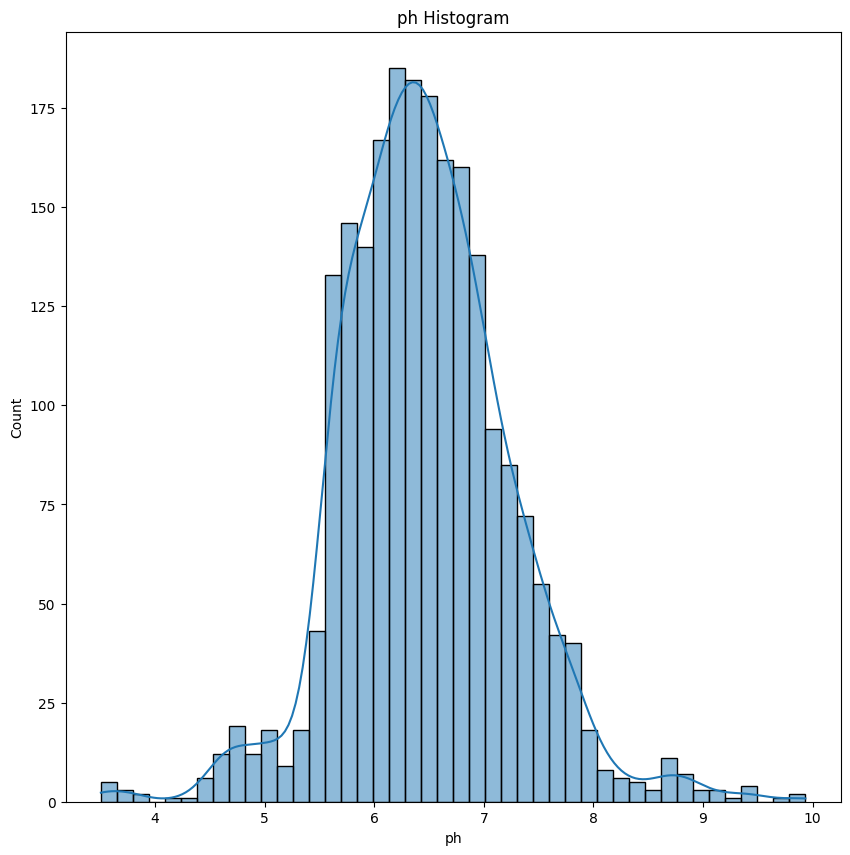

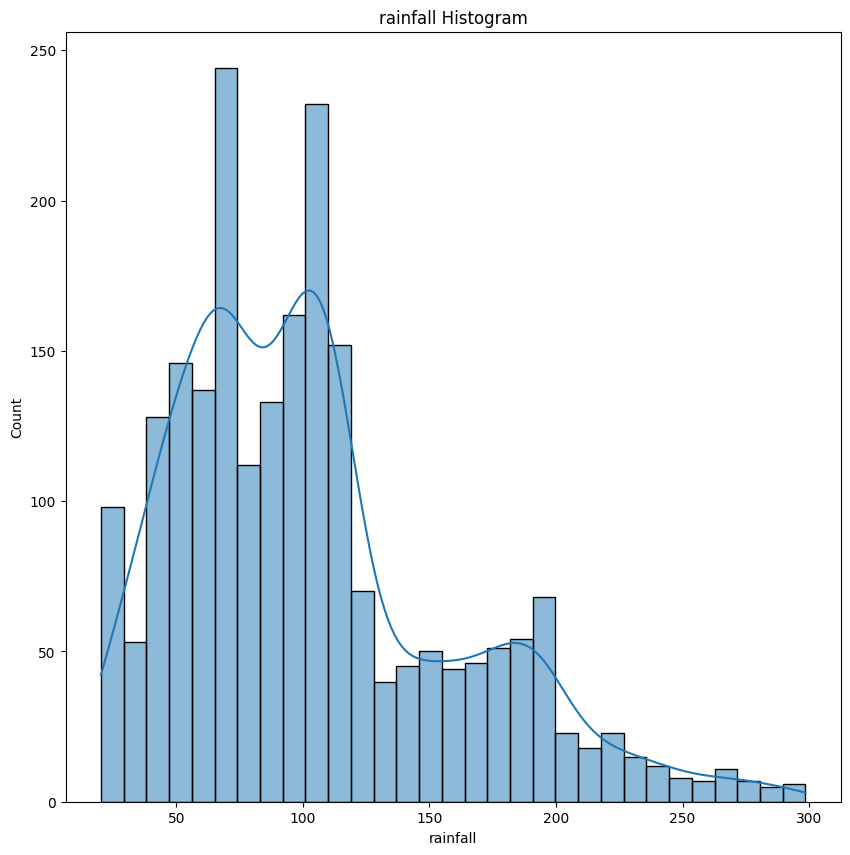

In [127]:
# Histogram to check Distributional Data from this dataset
plt.figure(figsize=(10,10))
sns.histplot(crops_df['N'],kde=True)
plt.title('N Histogram')
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(crops_df['P'],kde=True)
plt.title('P Histogram')
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(crops_df['K'],kde=True)
plt.title('K Histogram')
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(crops_df['temperature'],kde=True)
plt.title('temperature Histogram')
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(crops_df['humidity'],kde=True)
plt.title('humidity Histogram')
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(crops_df['ph'],kde=True)
plt.title('ph Histogram')
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(crops_df['rainfall'],kde=True)
plt.title('rainfall Histogram')
plt.show()


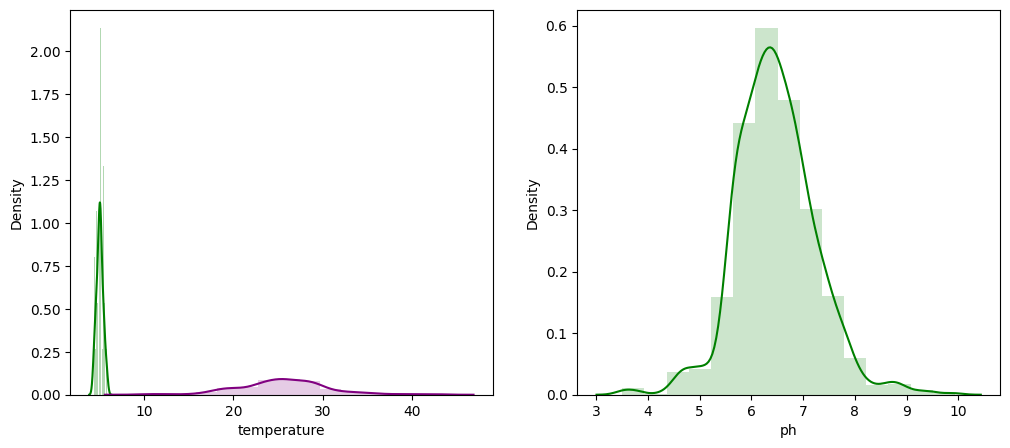

In [128]:
# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Filter the iris_df to get only the 'setosa' species
df_setosa = iris_df[iris_df['species'] == 'setosa']

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

# Now you can use df_setosa['sepal length (cm)']
sns.distplot(df_setosa['sepal length (cm)'], kde=True, color='green', bins=20, hist_kws={'alpha':0.3})
sns.distplot(crops_df['temperature'], color="purple", bins=15, hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(crops_df['ph'], color="green", bins=15, hist_kws={'alpha':0.2})
plt.show()

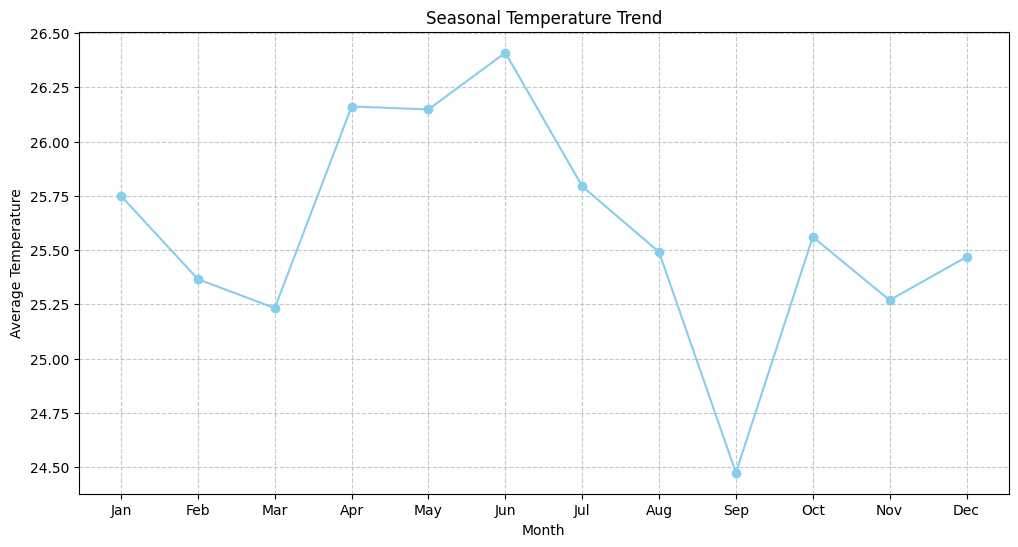

In [129]:
# Convert 'date' column to datetime objects if it's not already
# Assuming your date column is named something else, e.g., 'Planting_Date'
# Replace 'Planting_Date' with the actual name of your date column if different
# crops_df['Planting_Date'] = pd.to_datetime(crops_df['Planting_Date'])
#The dataset does not contain any column called planting Date. The error is in this line

# Assuming there is no date/time column and you are interested in seasonal patterns based on months
# We can use a dummy index for demonstration purposes.
# Replace this with the actual date column name if available

# Creating a dummy 'Month' column for demonstration
crops_df['Month'] = np.random.randint(1, 13, size=len(crops_df))

# Group data by month and calculate the mean temperature for each month
seasonal_trends = crops_df.groupby('Month')['temperature'].mean()

# Plotting the seasonal trend
plt.figure(figsize=(12, 6))
seasonal_trends.plot(kind='line', marker='o', color='skyblue')
plt.title('Seasonal Temperature Trend')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='count', ylabel='label'>

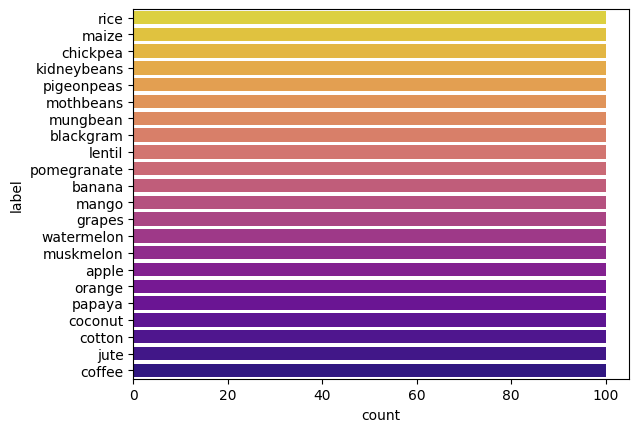

In [130]:
sns.countplot(y='label',data=crops_df, palette="plasma_r")

<Axes: xlabel='ph', ylabel='label'>

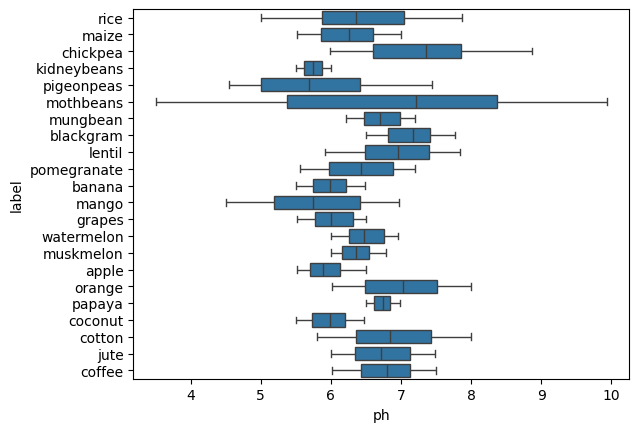

In [131]:
sns.boxplot(y='label',x='ph',data=crops_df)

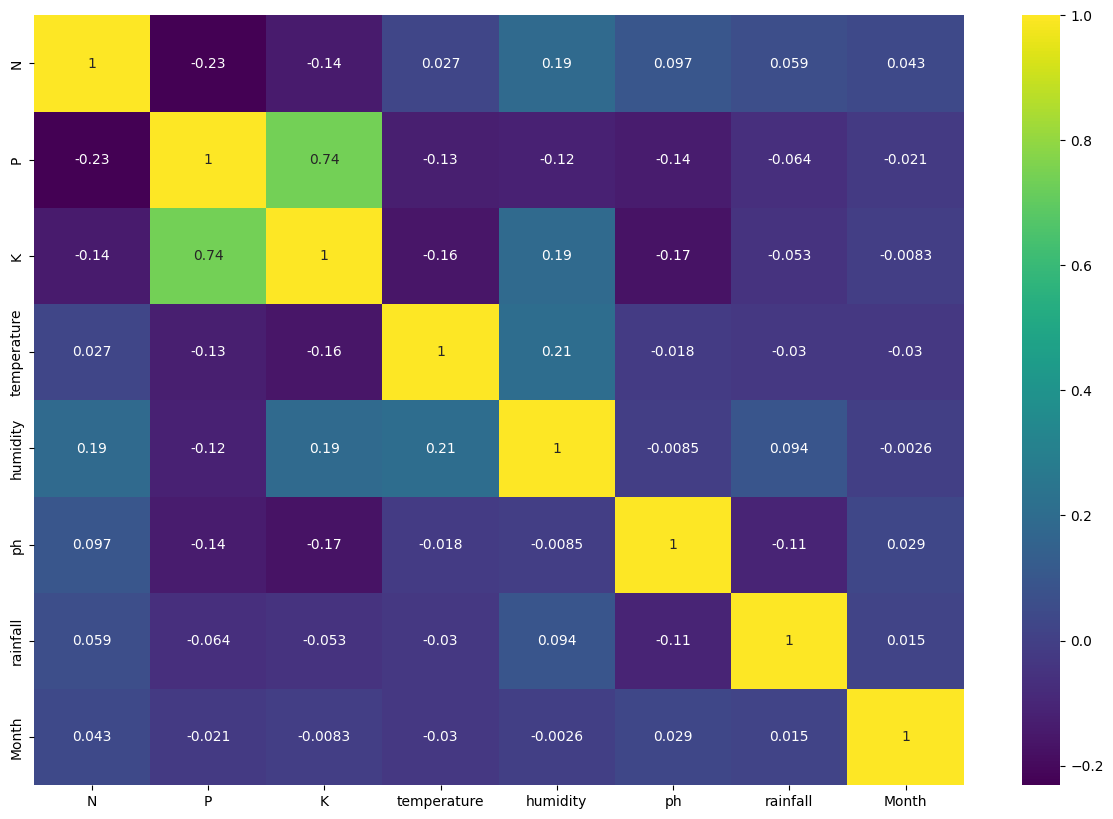

In [132]:
# Assuming crops_df is already loaded as in your previous code

plt.figure(figsize=(15, 10))
# Select only numeric columns for correlation calculation
numeric_df = crops_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.show()

#Feature Scaling & Feature Engineering

In [133]:
features = crops_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crops_df['label']
labels = crops_df['label']

In [134]:
acc = []
model = []

In [135]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [136]:
# Previous code for importing libraries, reading data, etc.

from sklearn.model_selection import train_test_split

# Define features and target
features = crops_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crops_df['label']
labels = crops_df['label']

# Split data into training and testing sets
# This line is crucial to define Xtrain and Xtest
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Convert scaled features back to DataFrames (optional but recommended)
Xtrain_scaled_df = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
Xtest_scaled_df = pd.DataFrame(Xtest_scaled, columns=Xtest.columns)

#Model Selection

###KNN Classifier for Crop prediction

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain_scaled, Ytrain) # Changed X_train_scaled to Xtrain_scaled and y_train to Ytrain
knn.score(Xtest_scaled, Ytest) # Changed X_test_scaled to Xtest_scaled and y_test to Ytest

0.9704545454545455

###Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # Import the metrics module
from sklearn.metrics import classification_report # Import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values) # Now metrics is defined and can be used
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values)) # Now classification_report is defined and can be used

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

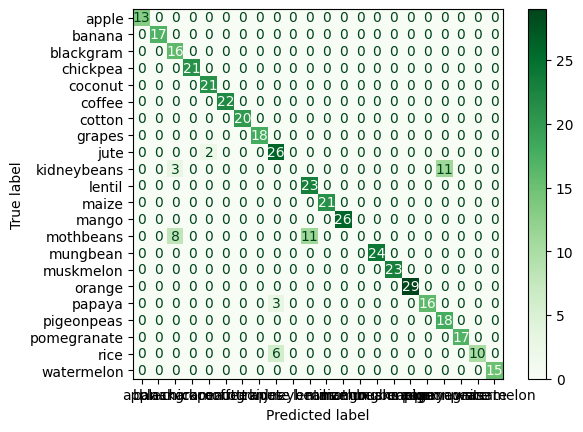

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Ytest, predicted_values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DecisionTree.classes_)
disp.plot(cmap="Greens")

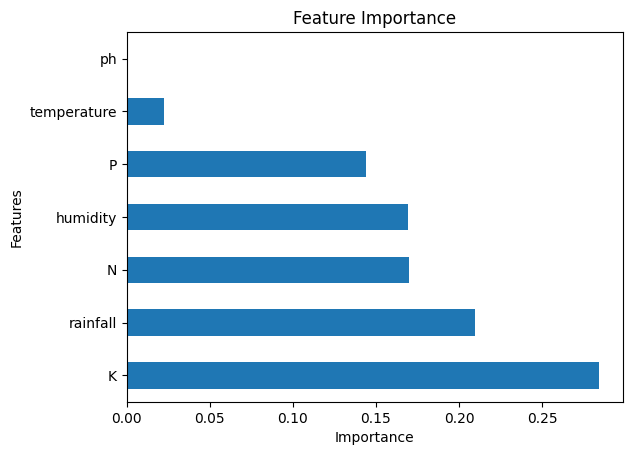

In [140]:
feature_importance = pd.Series(DecisionTree.feature_importances_, index=Xtrain.columns)
feature_importance.nlargest(7).plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

#Cross-Validation Process of Data

In [141]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTree, Xtrain, Ytrain, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Average CV Score:", scores.mean())

Cross-Validation Accuracy Scores: [0.85795455 0.86079545 0.92613636 0.93465909 0.88636364]
Average CV Score: 0.8931818181818182


In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [144]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [145]:
# Mean of Score
score.mean()

np.float64(0.9140909090909091)

In [146]:
# Standard Deviation of Score
score.std()

np.float64(0.024240530229042524)

In [147]:
score = cross_val_score(knn, features, target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [148]:
score = np.array([1, 2, 3, 4, 5])
score.min()

np.int64(1)

In [149]:
score = np.array([1, 2, 3, 4, 5])
score.max()

np.int64(5)